In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [20]:
from matplotlib.pylab import rand
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

X, y = make_blobs(n_samples=50, centers=5, random_state=42, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled1 = mms.transform(X_test)      # 훈련 데이터의 스케일 변환 규칙 적용
X_test_scaled2 = mms.fit_transform(X_test)  # 테스트 데이터의 스케일 변환 규칙 별도로 적용


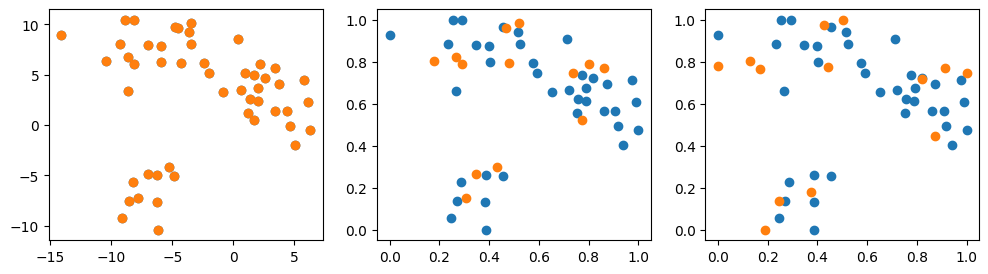

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes = axes.flatten()

axes[0].scatter(X[:, 0], X[:, 1])
axes[0].scatter(X[:, 0], X[:, 1])

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
axes[1].scatter(X_test_scaled1[:, 0], X_test_scaled1[:, 1])

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
axes[2].scatter(X_test_scaled2[:, 0], X_test_scaled2[:, 1])

plt.show()

In [23]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer['data']
y = breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

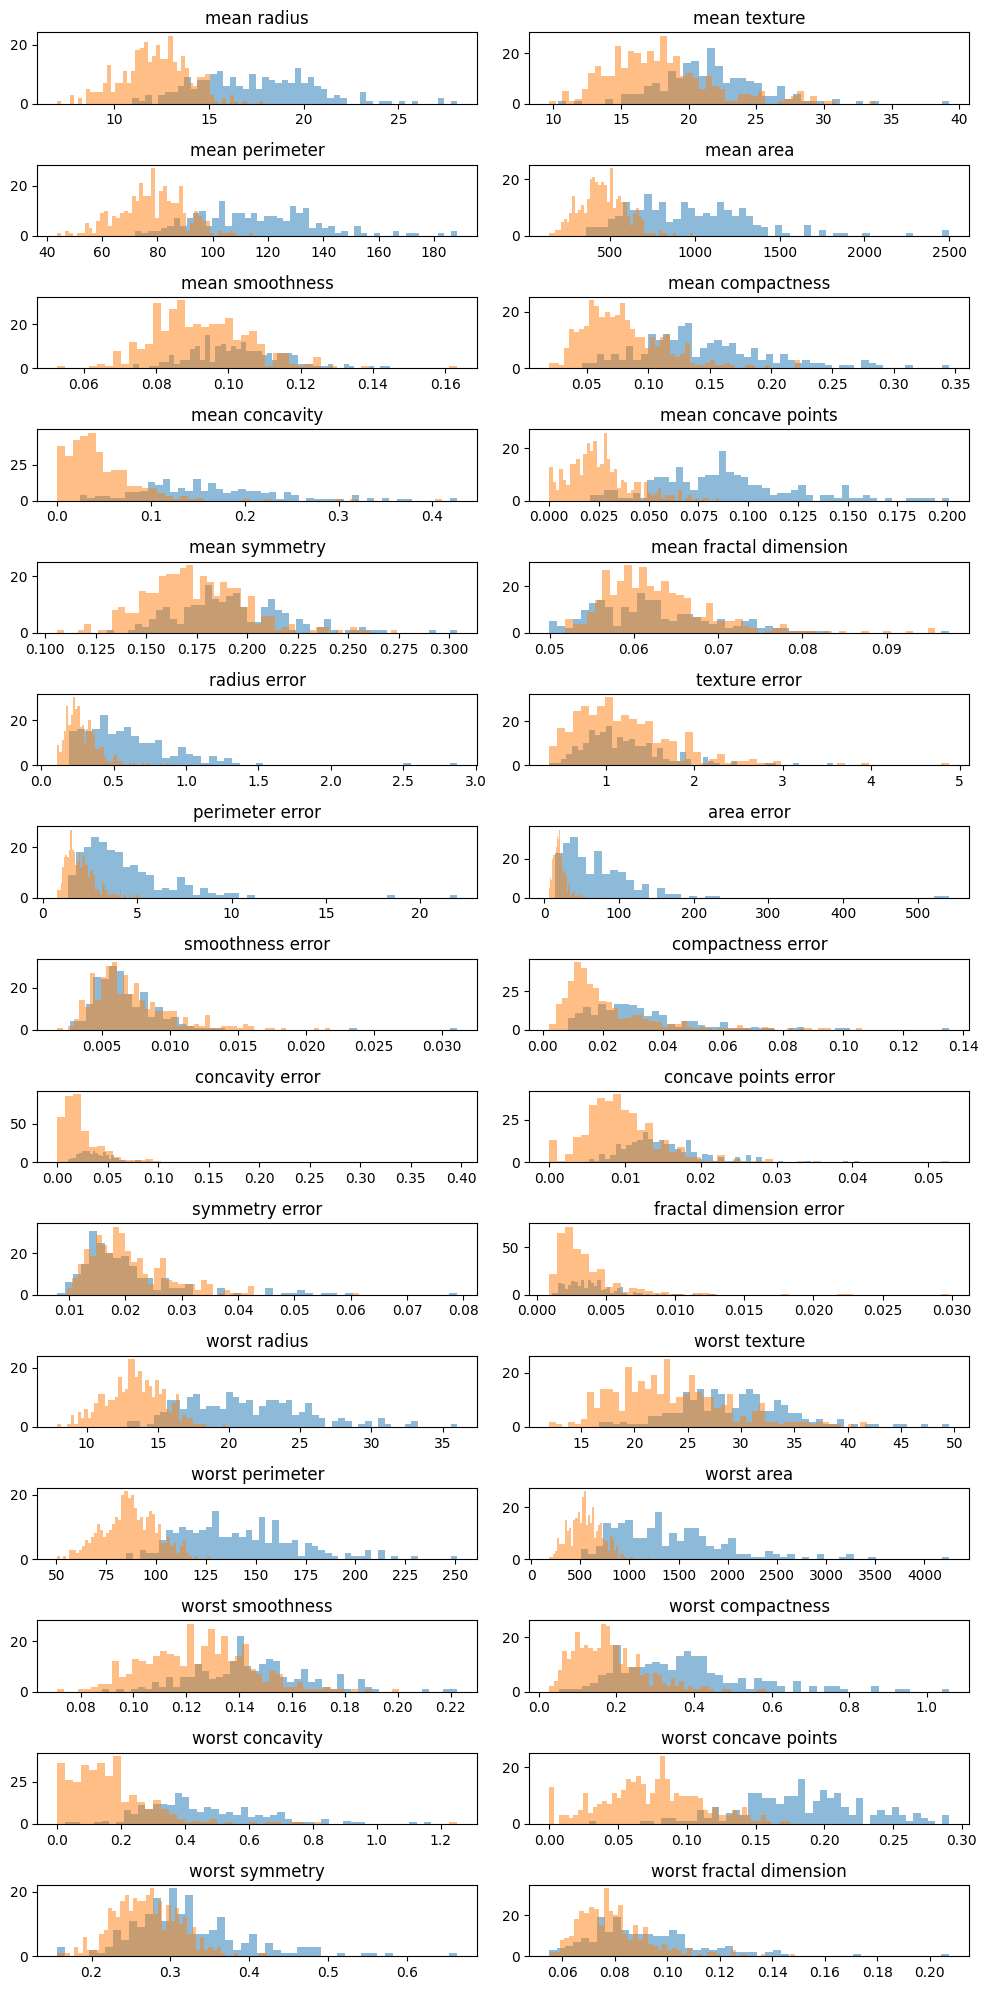

In [29]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    ax.hist(X[y==0, idx], bins=50, alpha=0.5)
    ax.hist(X[y==1, idx], bins=50, alpha=0.5)
    ax.set_title(breast_cancer['feature_names'][idx])

fig.tight_layout()
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# pca.fit(X)
pca.fit(X_scaled) # PCA 적용 데이터는 평균 0, 표준편차 1로 정규화된 데이터 사용 권장

X_pca = pca.transform(X_scaled)

X.shape, X_pca.shape

((569, 30), (569, 2))

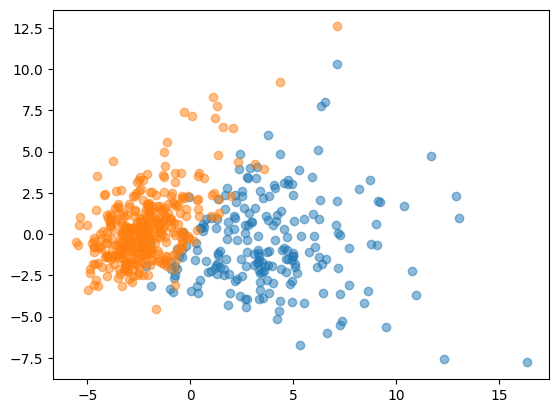

In [37]:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.5)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.5)
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X, y)
logreg2 = LogisticRegression(max_iter=10000)
logreg2.fit(X_pca, y)

print(X.shape, X_pca.shape)
logreg.score(X, y), logreg2.score(X_pca, y)

(569, 30) (569, 2)


(0.9578207381370826, 0.9560632688927944)

In [43]:
print( pca.components_.shape ) # 입력을 추출된 속성값으로 변환하는 가중치
print( pca.explained_variance_ratio_)

(2, 30)
[0.44272026 0.18971182]


In [46]:
pca2 = PCA(n_components=10)
pca2.fit(X_scaled) # PCA 적용 데이터는 평균 0, 표준편차 1로 정규화된 데이터 사용 권장
X_pca2 = pca2.transform(X_scaled)

print( pca2.components_.shape ) # 입력을 추출된 속성값으로 변환하는 가중치
print( pca2.explained_variance_ratio_)
print( np.cumsum(pca2.explained_variance_ratio_) )

(10, 30)
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881]


In [47]:
X, y = make_blobs(n_samples=200, centers=3, random_state=42, cluster_std=2)

In [50]:
np.unique(y)

array([0, 1, 2])

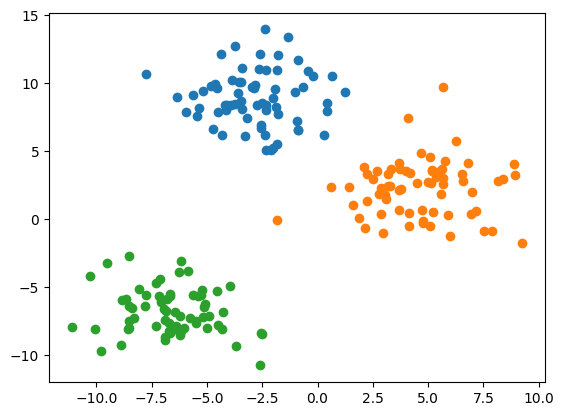

In [49]:
for label in np.unique(y):
    plt.scatter(X[y==label, 0], X[y==label, 1])
plt.show()

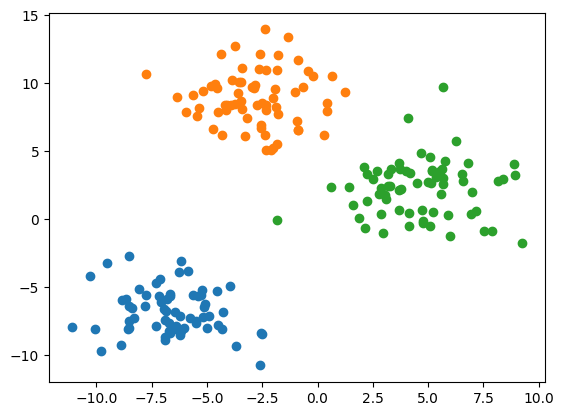

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
predicted_clusters = kmeans.predict(X)

for cluster in np.unique(predicted_clusters):
    plt.scatter(X[predicted_clusters==cluster, 0], X[predicted_clusters==cluster, 1])
plt.show()

In [56]:
print( kmeans.cluster_centers_ )
print( kmeans.labels_)
print( kmeans.predict(X) ) # 각 데이터별 예측된 군집 정보


[[-6.61116042 -6.82277715]
 [-2.80844495  8.9008503 ]
 [ 4.62448572  2.22925786]]
[2 1 0 0 0 0 1 0 2 0 2 2 2 2 2 0 1 0 2 0 2 2 0 1 0 1 1 0 1 2 2 2 0 0 1 1 0
 1 0 1 2 1 0 2 0 2 2 0 2 1 0 1 0 1 1 1 0 2 1 2 0 1 0 0 0 0 1 1 0 1 1 0 1 2
 1 2 2 1 2 1 1 2 2 0 0 0 0 1 2 0 2 1 1 1 2 0 1 2 2 1 0 0 1 0 1 2 0 2 2 0 2
 2 1 0 1 0 0 1 1 1 0 2 1 0 0 2 1 1 2 1 2 0 1 0 0 2 2 2 1 2 1 1 0 2 2 1 2 0
 0 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 2 2 1 0 2 0 1 2 0 1 2 1 1 1 2 1 2 0 0 0
 1 2 2 2 1 1 2 0 0 1 0 1 1 2 2]
[2 1 0 0 0 0 1 0 2 0 2 2 2 2 2 0 1 0 2 0 2 2 0 1 0 1 1 0 1 2 2 2 0 0 1 1 0
 1 0 1 2 1 0 2 0 2 2 0 2 1 0 1 0 1 1 1 0 2 1 2 0 1 0 0 0 0 1 1 0 1 1 0 1 2
 1 2 2 1 2 1 1 2 2 0 0 0 0 1 2 0 2 1 1 1 2 0 1 2 2 1 0 0 1 0 1 2 0 2 2 0 2
 2 1 0 1 0 0 1 1 1 0 2 1 0 0 2 1 1 2 1 2 0 1 0 0 2 2 2 1 2 1 1 0 2 2 1 2 0
 0 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 2 2 1 0 2 0 1 2 0 1 2 1 1 1 2 1 2 0 0 0
 1 2 2 2 1 1 2 0 0 1 0 1 1 2 2]


In [61]:
from sklearn.metrics import silhouette_score # 군집의 완성도를 평가하는 지표

scores = []
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(X)
    predicted_clusters = kmeans.predict(X)
    score = silhouette_score(X, predicted_clusters)
    scores.append(score)


In [63]:
scores

[0.6947965016205384, 0.5616243292916195, 0.47452586434221433]